In [32]:
#Import necessary libraries and read the data
import pandas as pd
import numpy as np
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]

In [33]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


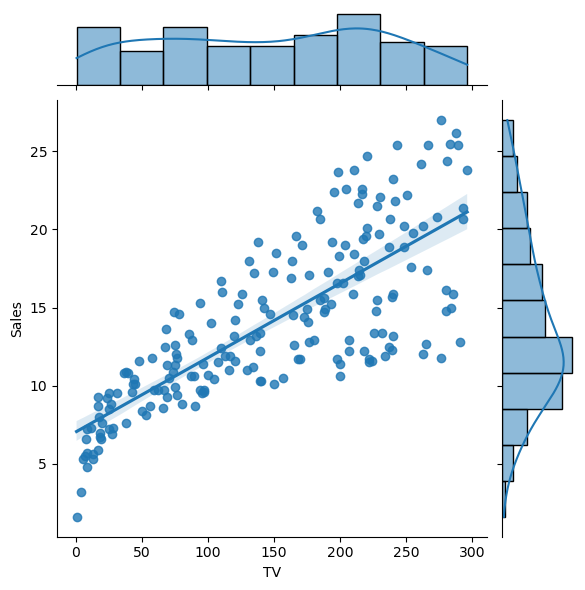

In [35]:
import seaborn as sns

sns.jointplot(x = "TV", y= "Sales", data = df , kind="reg")

In [36]:
from sklearn.linear_model import LinearRegression

X = df[["TV"]]

y = df[["Sales"]]

In [37]:
reg = LinearRegression()

In [38]:
model = reg.fit(X,y)

In [39]:
model.coef_ #b1

array([[0.04753664]])

In [40]:
model.intercept_ #b0

array([7.03259355])

In [41]:
model.score(X,y)

0.611875050850071

(0.0, 28.27)

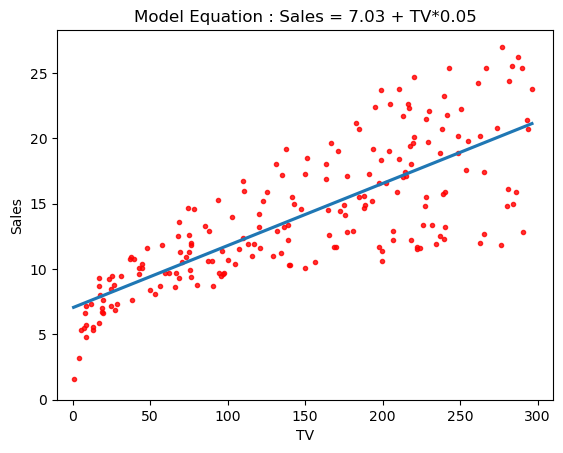

In [42]:
import matplotlib.pyplot as plt

g = sns.regplot(x=df["TV"], y=df["Sales"], ci = None, scatter_kws={"color" : "r", "s" : 9})

g.set_title("Model Equation : Sales = 7.03 + TV*0.05")
g.set_ylabel("Sales")
g.set_xlabel("TV")

plt.xlim(-10,310)
plt.ylim(bottom=0)

In [43]:
new_data = [[400],[500],[600]]

In [44]:
model.predict(new_data)

c:\Users\omerf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[26.04724972],
       [30.80091377],
       [35.55457781]])

In [45]:
real_y = y[0:10]

In [46]:
predicted_y = pd.DataFrame(model.predict(X)[0:10])

In [47]:
errors = pd.concat([real_y, predicted_y], axis=1)

In [48]:
errors.columns = ["Real Values", "Predicted Values"]

In [49]:
errors

,Real Values,Predicted Values
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [50]:
errors["Error"] = errors["Real Values"] - errors["Predicted Values"]

In [55]:
errors["MSE"] = np.mean(errors["Error"]**2)

In [56]:
errors

,Real Values,Predicted Values,Error,MSE
0,22.1,17.970775,4.129225,9.29035
1,10.4,9.147974,1.252026,9.29035
2,9.3,7.850224,1.449776,9.29035
3,18.5,14.234395,4.265605,9.29035
4,12.9,15.627218,-2.727218,9.29035
5,7.2,7.446162,-0.246162,9.29035
6,11.8,9.765950,2.034050,9.29035
7,13.2,12.746498,0.453502,9.29035
8,4.8,7.441409,-2.641409,9.29035
9,10.6,16.530414,-5.930414,9.29035
